# PHQ615 : Calculs 

## Calcul de la connexion affine et du tenseur de Riemann à partir de la métrique

## Métrique isotrope et statique

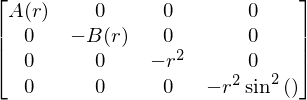

In [1]:
from sympy import *
from sympy import Array

init_printing()

t, r, θ, ϕ = symbols('t, r, θ, ϕ')
A = Function('A')
B = Function('B')
gd = Array([[A(r), 0, 0, 0],[0, -B(r), 0, 0], [0, 0, -r**2, 0],[0, 0, 0, -r**2*sin(θ)**2]])
coords = Array([t, r,θ, ϕ])
gu = Array([[1/A(r), 0, 0, 0],[0, -1/B(r), 0, 0], [0, 0, -1/r**2, 0],[0, 0, 0, -1/(r**2*sin(θ)**2)]])
gd

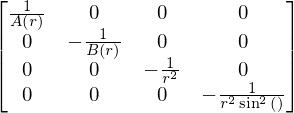

In [2]:
gu

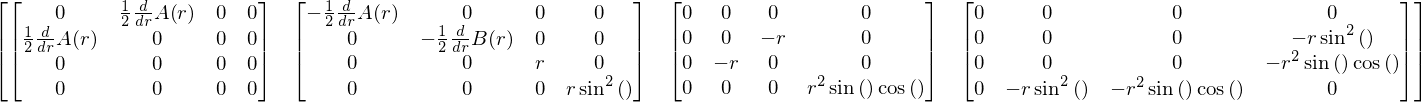

In [5]:
# connexion affine 'covariante'
dg = derive_by_array(gd, coords)
gammad = (permutedims(dg,(2,0,1)) + permutedims(dg,(2,1,0))-dg)/2
gammad = factor(gammad)
gammad

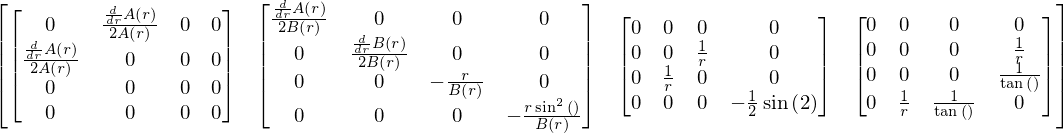

In [6]:
# connexion affine
Γ = tensorcontraction(tensorproduct(gu, gammad), (1,2))
Γ = simplify(Γ)
Γ

In [8]:
latex(Γ)

'\\left[\\begin{matrix}\\left[\\begin{matrix}0 & \\frac{\\frac{d}{d r} A{\\left (r \\right )}}{2 A{\\left (r \\right )}} & 0 & 0\\\\\\frac{\\frac{d}{d r} A{\\left (r \\right )}}{2 A{\\left (r \\right )}} & 0 & 0 & 0\\\\0 & 0 & 0 & 0\\\\0 & 0 & 0 & 0\\end{matrix}\\right] & \\left[\\begin{matrix}\\frac{\\frac{d}{d r} A{\\left (r \\right )}}{2 B{\\left (r \\right )}} & 0 & 0 & 0\\\\0 & \\frac{\\frac{d}{d r} B{\\left (r \\right )}}{2 B{\\left (r \\right )}} & 0 & 0\\\\0 & 0 & - \\frac{r}{B{\\left (r \\right )}} & 0\\\\0 & 0 & 0 & - \\frac{r \\sin^{2}{\\left (θ \\right )}}{B{\\left (r \\right )}}\\end{matrix}\\right] & \\left[\\begin{matrix}0 & 0 & 0 & 0\\\\0 & 0 & \\frac{1}{r} & 0\\\\0 & \\frac{1}{r} & 0 & 0\\\\0 & 0 & 0 & - \\frac{1}{2} \\sin{\\left (2 θ \\right )}\\end{matrix}\\right] & \\left[\\begin{matrix}0 & 0 & 0 & 0\\\\0 & 0 & 0 & \\frac{1}{r}\\\\0 & 0 & 0 & \\frac{1}{\\tan{\\left (θ \\right )}}\\\\0 & \\frac{1}{r} & \\frac{1}{\\tan{\\left (θ \\right )}} & 0\\end{matrix}\\right]\\e

## Calcul du tenseur de Riemann

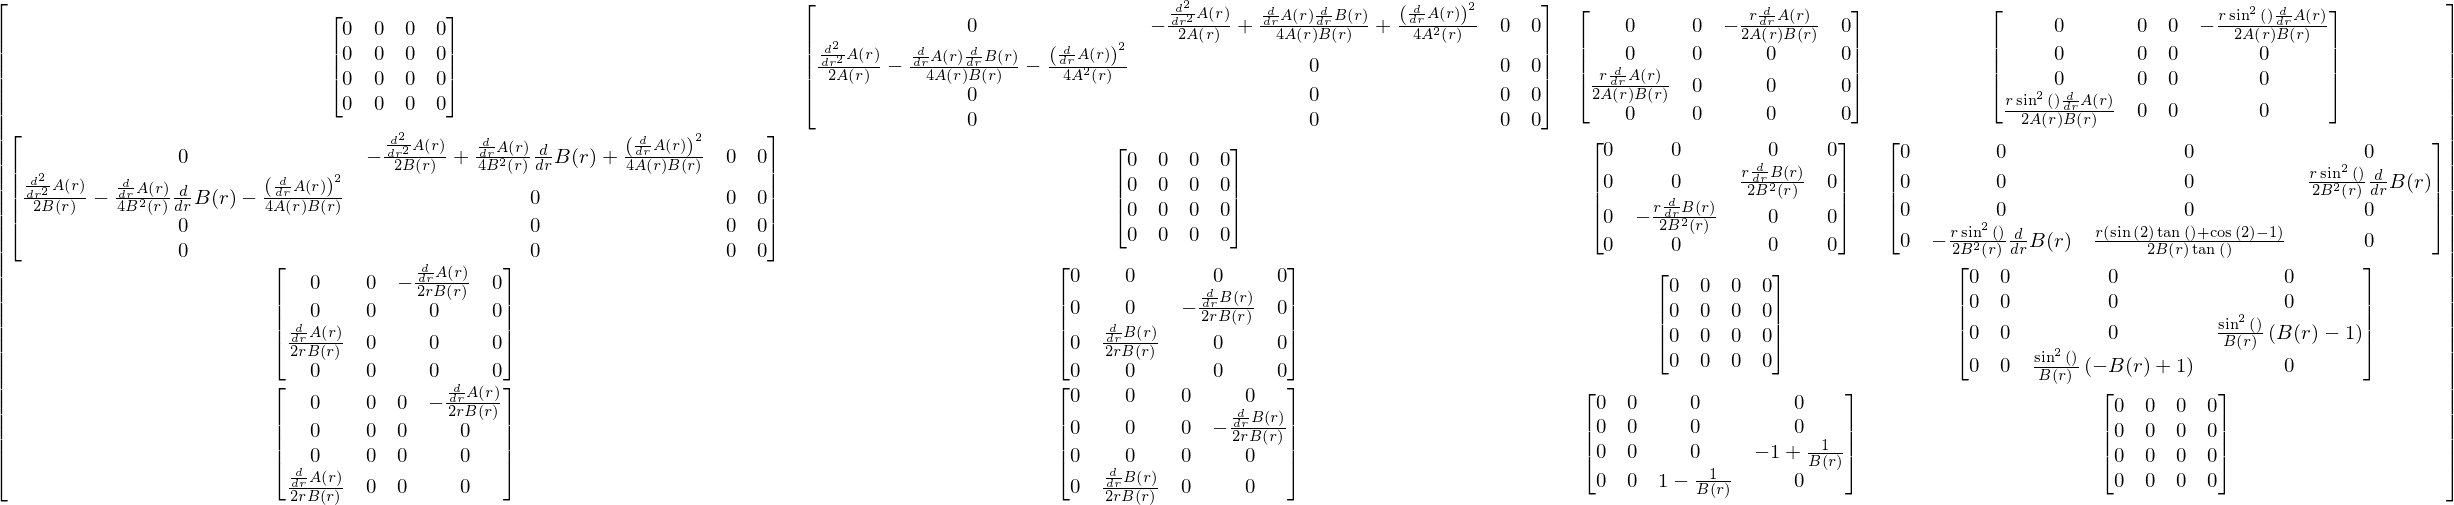

In [9]:
R1 = derive_by_array(Γ, coords)
C = tensorcontraction(tensorproduct(Γ, Γ), (0,4))
R = permutedims(R1,(1,2,0,3)) - permutedims(R1,(1,2,3,0)) + permutedims(C,(2,0,3,1)) - permutedims(C,(2,0,1,3))
R = simplify(R)
R

In [ ]:
# tenseur de Riemann covariant

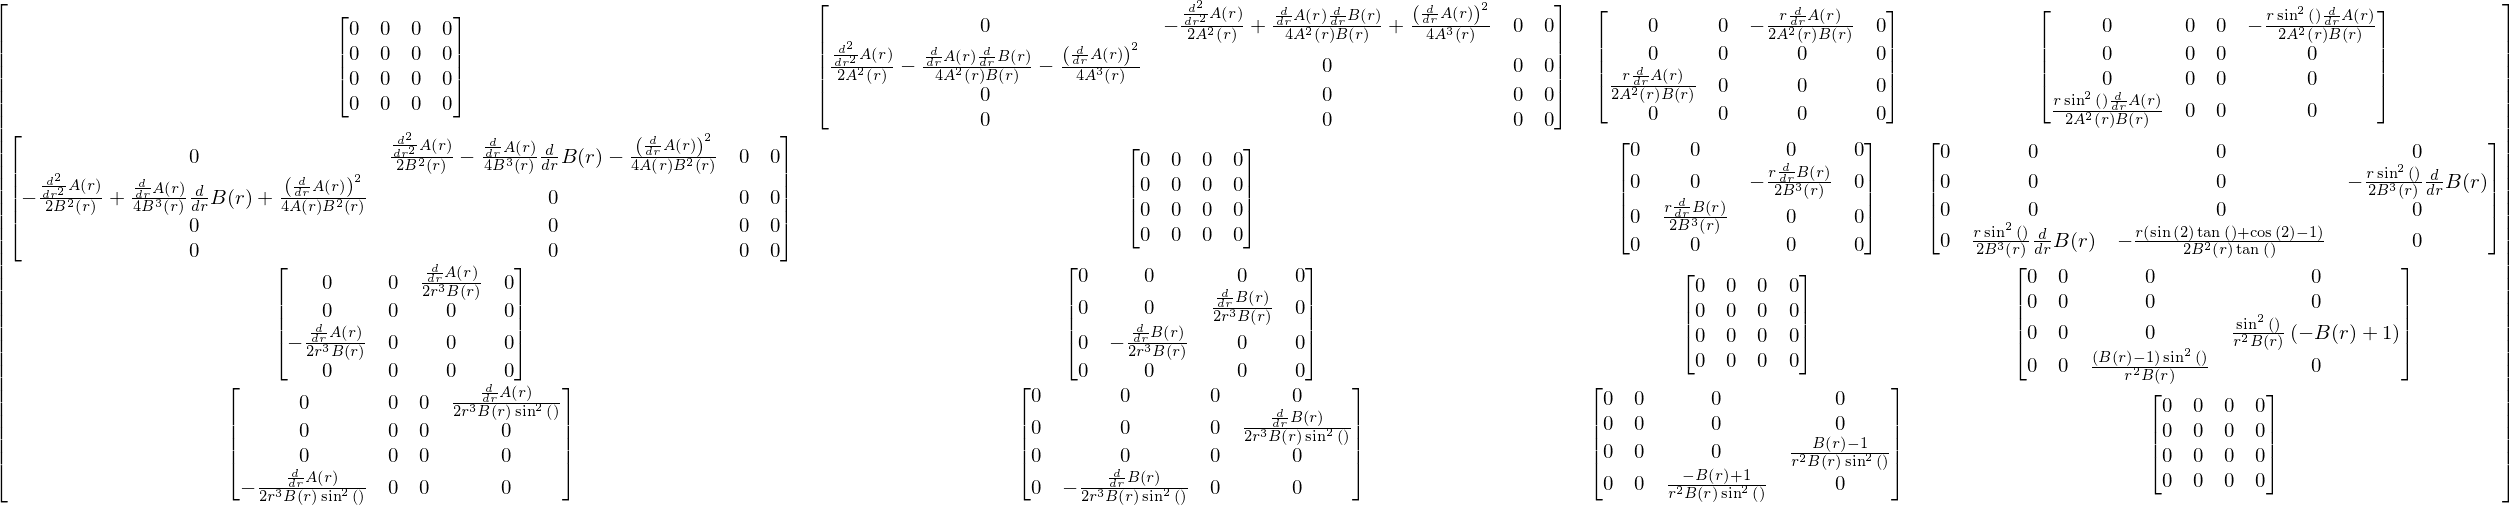

In [5]:
Rcov =  tensorcontraction(tensorproduct(gu, R), (1,2))
Rcov = simplify(Rcov)
Rcov

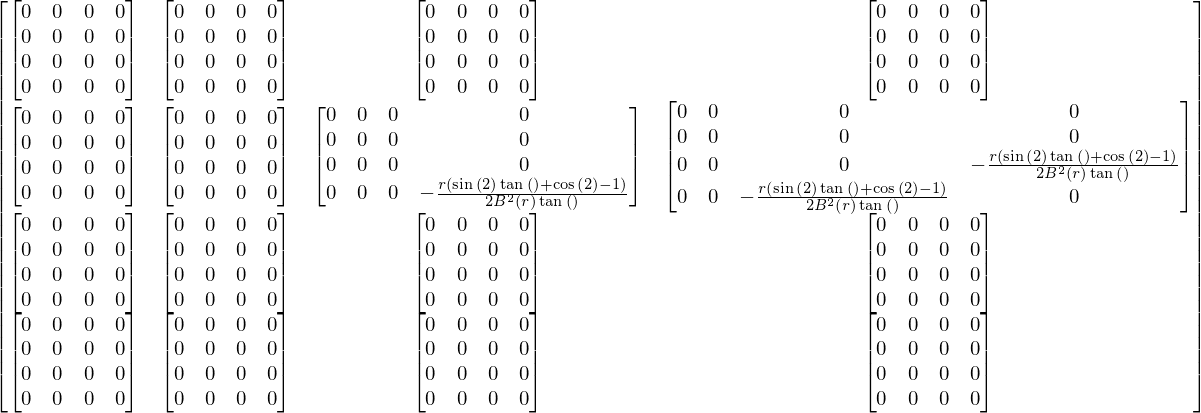

In [7]:
# vérification des propriétés de symétrie de Rcov
A = Rcov + permutedims(Rcov,(0,2,3,1)) + permutedims(Rcov,(0,3,1,2))
trigsimp(A)

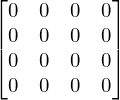

In [8]:
# vérification de la nullité de la contraction des deux premiers indices
tensorcontraction(R, (0,1))

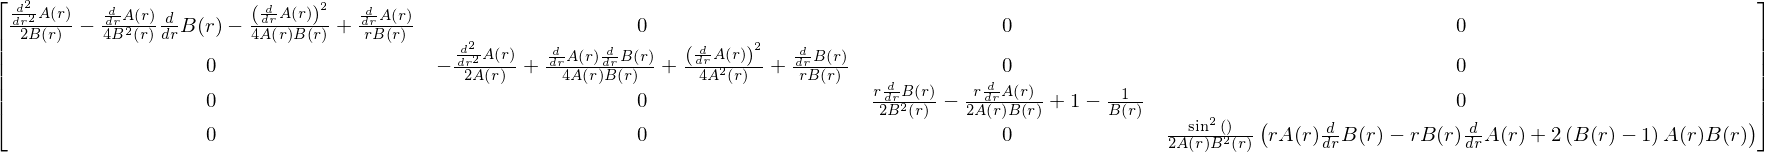

In [10]:
# tenseur de Ricci
Ricci = tensorcontraction(R, (0,2))
Ricci = simplify(Ricci)
Ricci

In [11]:
latex(Ricci[0,0])

'\\frac{\\frac{d^{2}}{d r^{2}}  A{\\left (r \\right )}}{2 B{\\left (r \\right )}} - \\frac{\\frac{d}{d r} A{\\left (r \\right )}}{4 B^{2}{\\left (r \\right )}} \\frac{d}{d r} B{\\left (r \\right )} - \\frac{\\left(\\frac{d}{d r} A{\\left (r \\right )}\\right)^{2}}{4 A{\\left (r \\right )} B{\\left (r \\right )}} + \\frac{\\frac{d}{d r} A{\\left (r \\right )}}{r B{\\left (r \\right )}}'

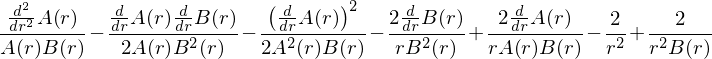

In [10]:
# Courbure scalaire
Rm = tensorcontraction(tensorproduct(gu,Ricci), (1,2))
Rscal = tensorcontraction(Rm, (0,1))
simplify(Rscal)

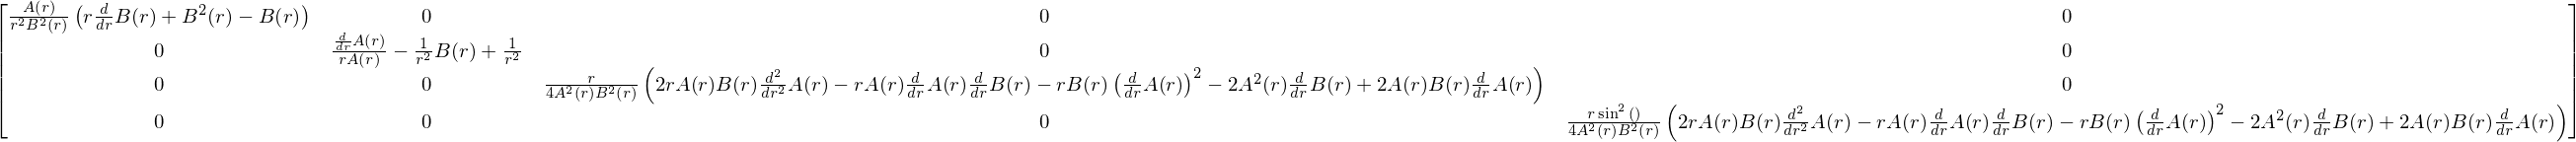

In [11]:
# tenseur d'Einstein
E = Ricci - gd*Rscal/2
E = simplify(E)
E

In [24]:
def dcov(A, coords, pos):
    rank = len(pos)
    D1 = derive_by_array(A, coords)
    for i in range(rank):
        perm = list(range(rank+1))
        perm[i+1] = 0
        perm[0] = 1
        for j in range(1, i+1):
            perm[j] += 1
        if pos[i] is 0:
            print('indice ', i, ' est covariant, perm = ', tuple(perm))
            B = tensorcontraction(tensorproduct(Γ, A), (0, i+3))
            D1 -= permutedims(B, perm)
        else:
            print('indice ', i, ' est contravariant, perm = ', tuple(perm))
            B = tensorcontraction(tensorproduct(Γ, A), (1, i+3))
            D1 += permutedims(B, perm)
    return D1


In [27]:
simplify(dcov(gd, coords, (0,0)))

indice  0  est covariant, perm =  (1, 0, 2)
indice  1  est covariant, perm =  (1, 2, 0)


⎡⎡0  0⎤  ⎡0  0⎤⎤
⎢⎢    ⎥  ⎢    ⎥⎥
⎣⎣0  0⎦  ⎣0  0⎦⎦

In [25]:
# identité de Bianchi

B = dcov(Rcov, coords, (0,0,0,0))
permutedims(B, (1,2,3,4,0))+permutedims(B, (1,2,0,3,4))+permutedims(B, (1,2,4,0,3))

indice  0  est covariant, perm =  (1, 0, 2, 3, 4)
indice  1  est covariant, perm =  (1, 2, 0, 3, 4)
indice  2  est covariant, perm =  (1, 2, 3, 0, 4)
indice  3  est covariant, perm =  (1, 2, 3, 4, 0)


⎡⎡⎡0  0⎤  ⎡0  0⎤⎤  ⎡⎡0  0⎤  ⎡0  0⎤⎤⎤
⎢⎢⎢    ⎥  ⎢    ⎥⎥  ⎢⎢    ⎥  ⎢    ⎥⎥⎥
⎢⎢⎣0  0⎦  ⎣0  0⎦⎥  ⎢⎣0  0⎦  ⎣0  0⎦⎥⎥
⎢⎢              ⎥  ⎢              ⎥⎥
⎢⎢⎡0  0⎤  ⎡0  0⎤⎥  ⎢⎡0  0⎤  ⎡0  0⎤⎥⎥
⎢⎢⎢    ⎥  ⎢    ⎥⎥  ⎢⎢    ⎥  ⎢    ⎥⎥⎥
⎣⎣⎣0  0⎦  ⎣0  0⎦⎦  ⎣⎣0  0⎦  ⎣0  0⎦⎦⎦

## Solution de Schwarzchild

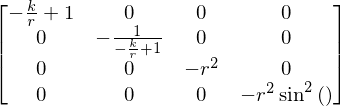

In [1]:
from sympy import *
from sympy import Array

init_printing()

t, r, θ, ϕ = symbols('t, r, θ, ϕ')
k = symbols('k')
gd = Array([[(1-k/r), 0, 0, 0],[0, -1/(1-k/r), 0, 0], [0, 0, -r**2, 0],[0, 0, 0, -r**2*sin(θ)**2]])
coords = Array([t, r,θ, ϕ])
gu = Array([[1/(1-k/r), 0, 0, 0],[0, -(1-k/r), 0, 0], [0, 0, -1/r**2, 0],[0, 0, 0, -1/(r**2*sin(θ)**2)]])
gd

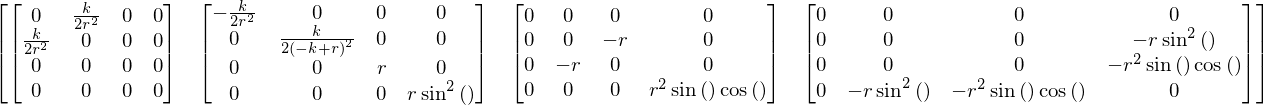

In [2]:
# connexion affine 'covariante'
dg = derive_by_array(gd, coords)
gammad = (permutedims(dg,(2,0,1)) + permutedims(dg,(2,1,0))-dg)/2
gammad = factor(gammad)
gammad

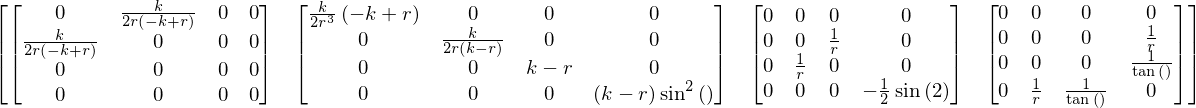

In [3]:
# connexion affine
Γ = tensorcontraction(tensorproduct(gu, gammad), (1,2))
Γ = simplify(Γ)
Γ

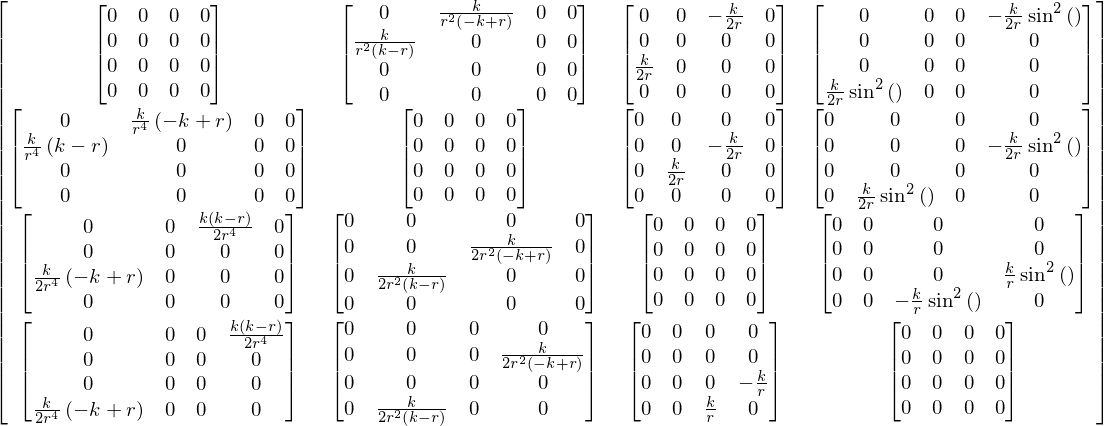

In [4]:
R1 = derive_by_array(Γ, coords)
C = tensorcontraction(tensorproduct(Γ, Γ), (0,4))
R = permutedims(R1,(1,2,0,3)) - permutedims(R1,(1,2,3,0)) + permutedims(C,(2,0,3,1)) - permutedims(C,(2,0,1,3))
R = simplify(R)
R

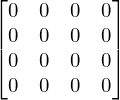

In [5]:
# tenseur de Ricci
Ricci = tensorcontraction(R, (0,2))
Ricci = simplify(Ricci)
Ricci

## Carré de la courbure

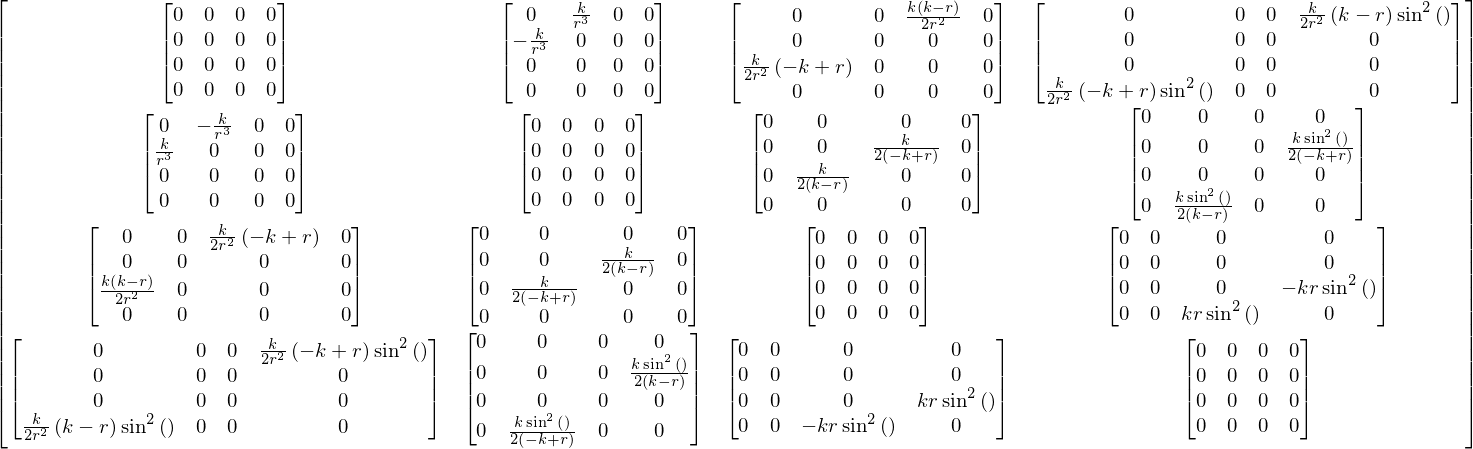

In [5]:
Rcov =  tensorcontraction(tensorproduct(gd, R), (1,2))
Rcov = simplify(Rcov)
Rcov

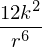

In [6]:
Rcontra = tensorcontraction(tensorproduct(gu, R), (1,3))
Rcontra = tensorcontraction(tensorproduct(gu, Rcontra), (1,4))
Rcontra = tensorcontraction(tensorproduct(gu, Rcontra), (1,5))
R2 = tensorcontraction(tensorproduct(Rcov, Rcontra), (0,4))
R2 = tensorcontraction(R2, (0,3))
R2 = tensorcontraction(R2, (0,2))
R2 = tensorcontraction(R2, (0,1))
R2 = simplify(R2)
R2